In [4]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [1]:
%matplotlib inline  
!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


# 데이터로드

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [45]:
df = pd.read_csv('/content/drive/My Drive/관광/진짜최종.csv')

# 데이터 전처리 및 변수 선택

In [46]:
def sigma_3(x):
  quartile_1 = df[x].quantile(0.25)
  quartile_3 = df[x].quantile(0.75)
  IQR = quartile_3 - quartile_1
  df_result = df[(df[x] < (quartile_1 - 1.5 * IQR)) | (df[x] > (quartile_3 + 1.5 * IQR))]
  df.drop(df_result.index, axis=0,inplace=True)


In [47]:
x_list = ['D_TRA1_S_Day','D_TRA1_COST','A8_TOTAL','A9A_1','A9A_2','A9B','A9C','A9D','A9E','A9F','A9F_5','A9G','A9I',"PA9I",'NA9I','A9I_1','NA9I_1','A9','A90D','A90F','A90G','A90I']
for i in x_list:
  sigma_3(i)

+ 최종본 복사를 위한 copy

In [48]:
df2=df.copy()

In [49]:
df.columns

Index(['D_TRA1_CASE', 'D_TRA1_S_Day', 'D_TRA1_COST', 'D_TRA1_1_SMONTH',
       'D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar', 'D_TRA1_1_Q6',
       'A1_1', 'A4_1', 'A5_1', 'A5_2', 'A5_3', 'A5_4', 'A5_5', 'A5_6', 'A5_7',
       'A5_8', 'A5_9', 'A5_10', 'A5_11', 'A5_12', 'A5_13', 'A5_14', 'A5_15',
       'A5_16', 'A5_17', 'A5_18', 'A5_19', 'A5_20', 'A8_TOTAL', 'A9A', 'A9A_1',
       'A9A_2', 'A9B', 'A9C', 'A9D', 'A9E', 'A9F', 'A9F_5', 'A9G', 'A9I',
       'PA9I', 'NA9I', 'A9I_1', 'NA9I_1', 'A9', 'A90D', 'A90F', 'A90G', 'A90I',
       'A10', 'A10A_1', 'A10A_2', 'A10A_3', 'A10A_4', 'A10A_5', 'A10A_6',
       'A10A_7', 'A10A_8', 'A10A_9', 'A10A_10', 'A10A_11', 'A10A_12', 'A11',
       'A12', 'DQ1', 'DQ2', 'DQ3', 'DQ3A_1', 'DQ5', 'DQ6A', 'DQ6B', 'BSEX',
       'BAGE', 'SAGE', 'BJOB', 'BINC1', 'BINC2', 'BEDU', 'BFAM', 'BMON',
       'BARA', 'WT_DOM', '국내_숙박여부', '국내_연간여행경험_국내숙박', '국내_연간여행경험_국내당일',
       '국내_연간여행경험_관광숙박', '국내_연간여행경험_관광당일', '국내_월별여행경험_국내숙박', '국내_월별여행경험_국내당일',
       '국내_월별

In [50]:
df.drop(columns=['SAGE','D_TRA1_1_SPOT', 'D_TRA1_1_Code', 'D_TRA1_1_Q6_Ar','D_TRA1_1_Q6'],inplace=True)

+ One hot encoding

In [51]:
OneHot = ['D_TRA1_CASE', 'BARA', 'BJOB','DQ3','A1_1','A4_1']
df3 = pd.get_dummies(df, columns = OneHot)

+ clustering 변수 선택

In [52]:
변수리스트=df3.columns.tolist()

+ Normalization 진행

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[변수리스트] = scaler.fit_transform(df3[변수리스트])

In [54]:
feature = df3[변수리스트]

# Clustering

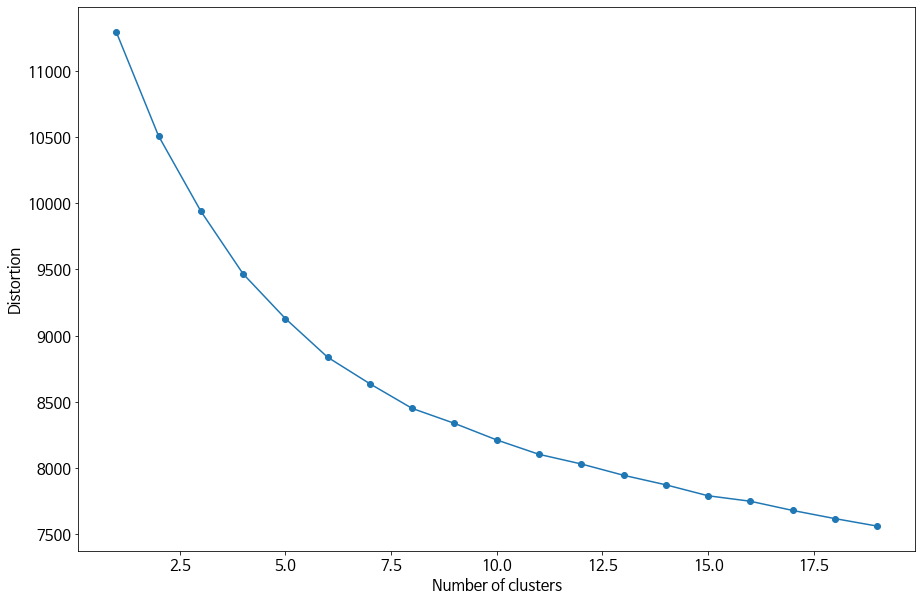

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km.fit(df3[변수리스트])
    distortions.append(km.inertia_)
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [56]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7,algorithm='auto')
model.fit(feature)
predict = pd.DataFrame(model.predict(feature))
predict.columns=['predict']

In [57]:
df2.reset_index(inplace=True,drop=True)
df3.reset_index(inplace=True,drop=True)

In [58]:
df3['cluster'] = predict
df2['cluster'] = predict
change = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G'}
df2 = df2.replace({'cluster':change})
df2.to_csv('/content/drive/My Drive/관광/클러스터최종.csv')

# 만족도 MODELING

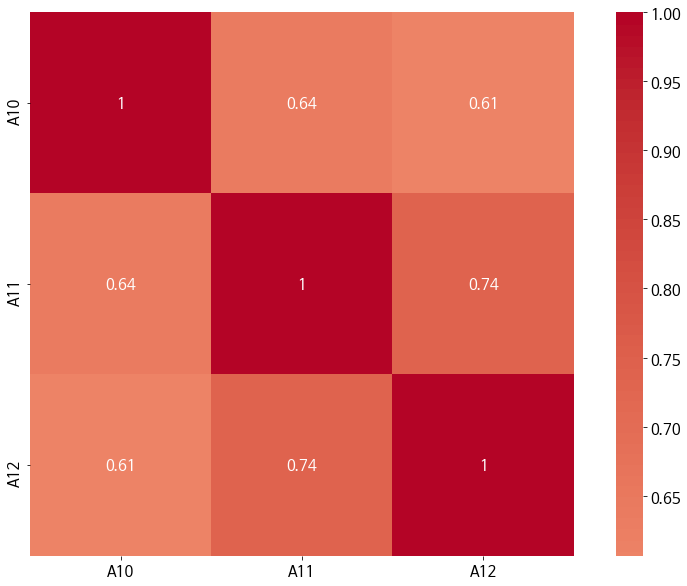

In [59]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
correlations = df[['A10','A11','A12']].corr(method='pearson')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)

In [60]:
Y = df3['A10']
X = df3.drop(columns=['A10','A11','A12'])
# shuffle = True
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,  Y,  test_size=0.4, shuffle=True, random_state=1004)

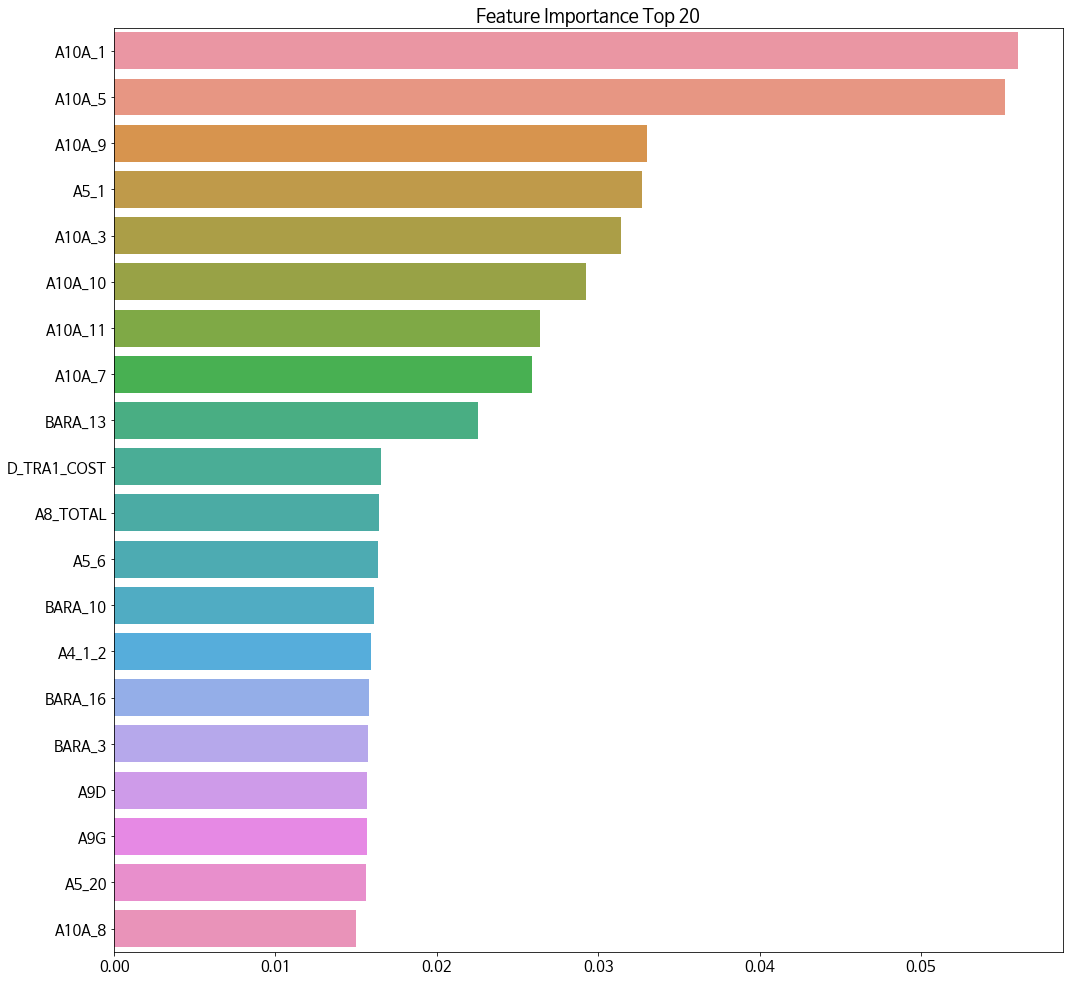

In [66]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=11)
model.fit(X_train, y_train)

ft_importance_values = model.feature_importances_
ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(17, 17))
plt.rc('font', family='NanumBarunGothic') 
plt.title('Feature Importance Top 20')

sns.barplot(x=ft_top20, y=ft_top20.index)


+ cluster별 dataframe 분화

In [62]:
for i in ['A','B','C','D','E','F','G']:
  globals()['df_{}'.format(i)] = df[df['cluster'] == i]

In [84]:
def Top20(df):
  from xgboost import XGBClassifier
  from sklearn.model_selection import train_test_split
  Y = df['A10']
  X = df.drop(columns=['A10','A11','A12'])
  
  X_train, X_test, y_train, y_test = train_test_split(X, Y,  test_size=0.4, shuffle=True, random_state=1004)

  model = XGBClassifier(random_state=11)
  model.fit(X_train, y_train)

  ft_importance_values = model.feature_importances_
  ft_series = pd.Series(ft_importance_values, index = X_train.columns)
  ft_top20 = ft_series.sort_values(ascending=False)[:20]
  plt.title('Feature Importance Top 20')

  plt.rc('font', family='NanumBarunGothic')
  sns.barplot(x=ft_top20, y=ft_top20.index)
  plt.figure(figsize=(17, 17))
  df_so = ft_top20.to_frame()
  spool=df_so.index.tolist()
  spool.append('A10')
  correlations = df[spool].corr(method='pearson')
  plt.rc('font', family='NanumBarunGothic')
  sns.heatmap(correlations, cmap="coolwarm", square=True, center=0, annot=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


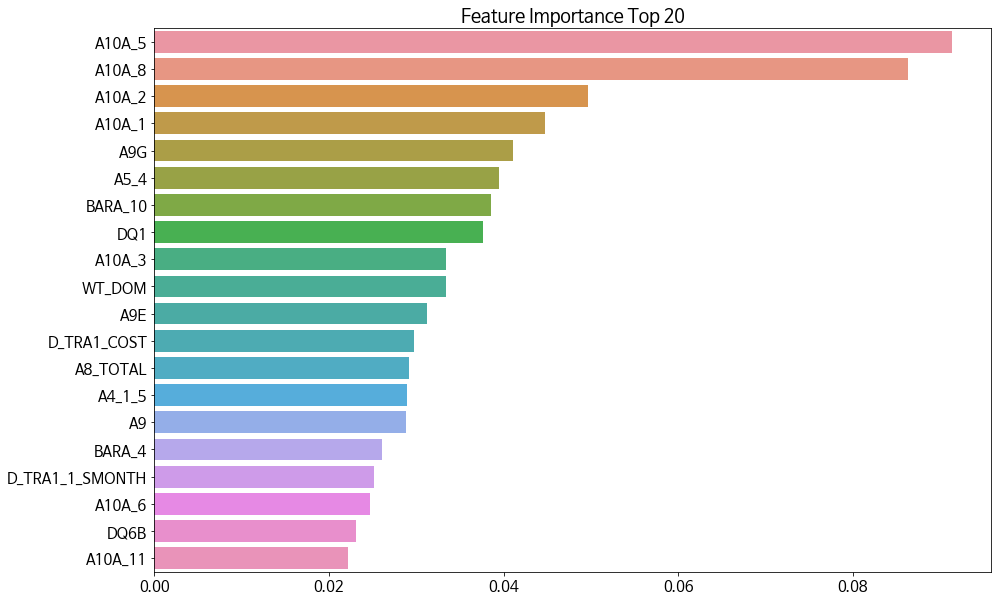

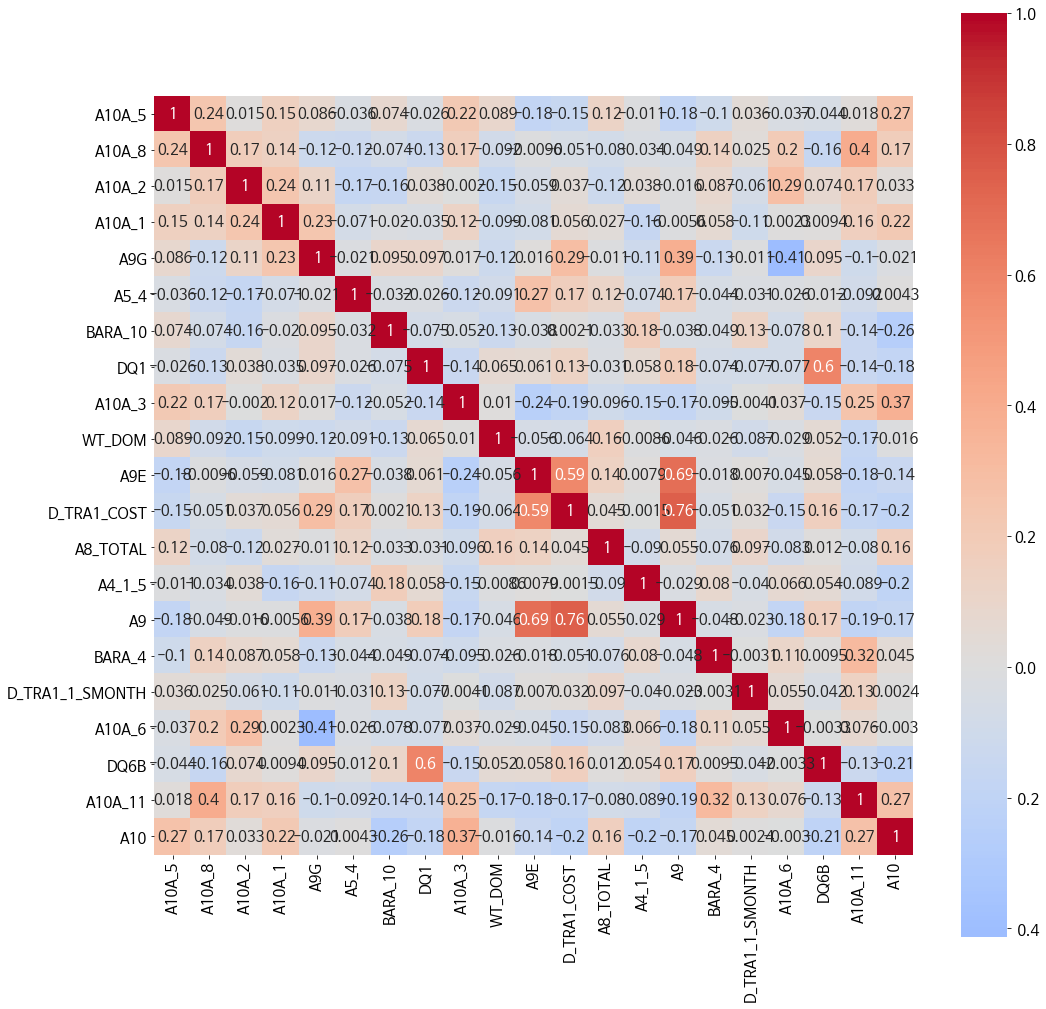

In [85]:
Top20(df_A)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


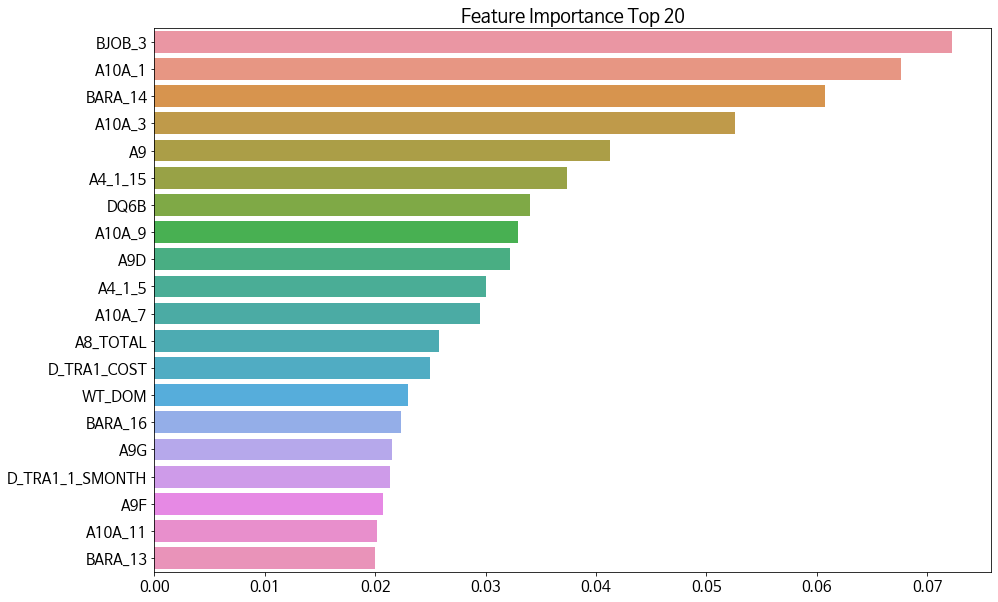

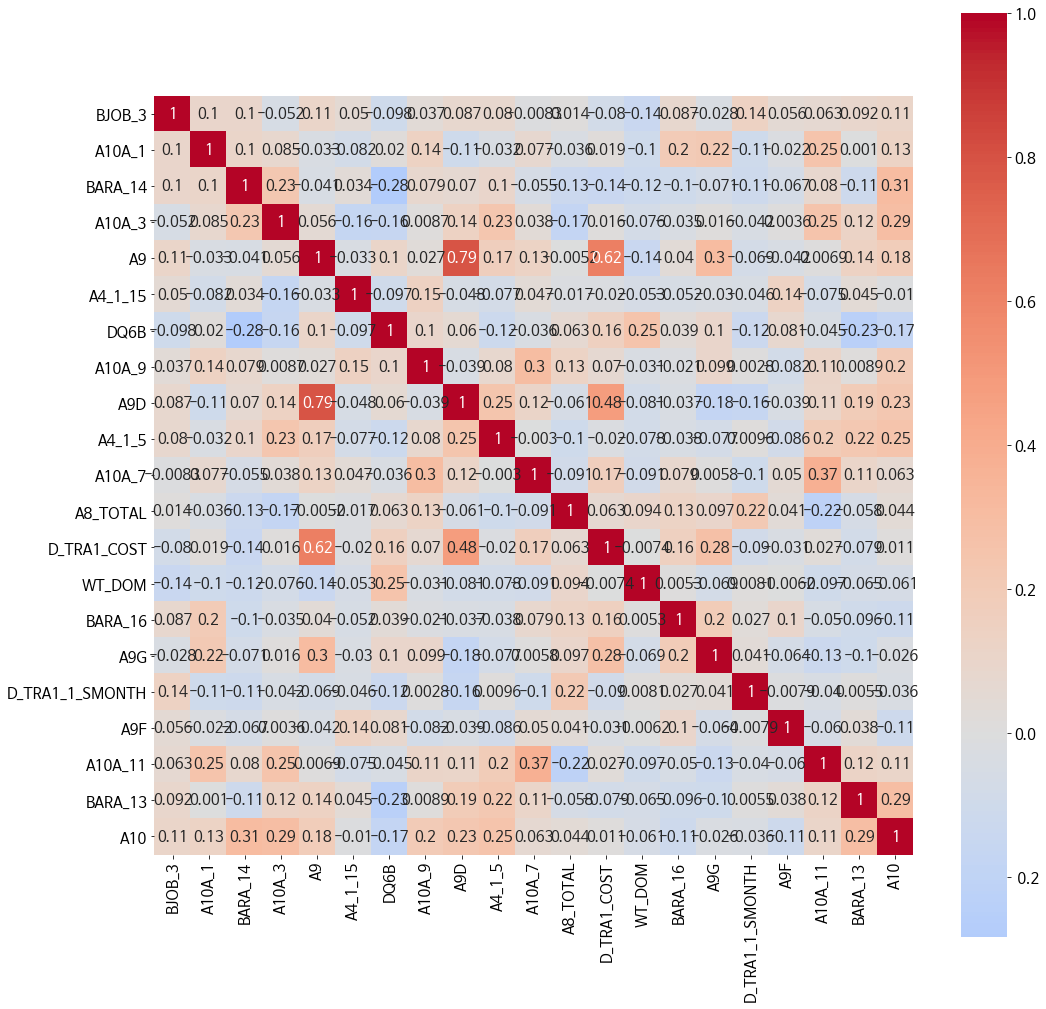

In [86]:
Top20(df_B)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


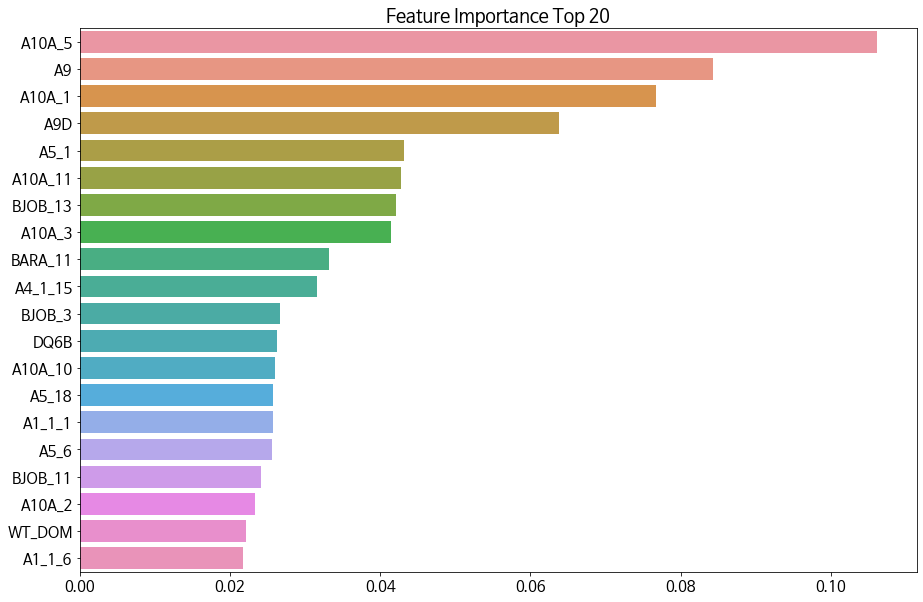

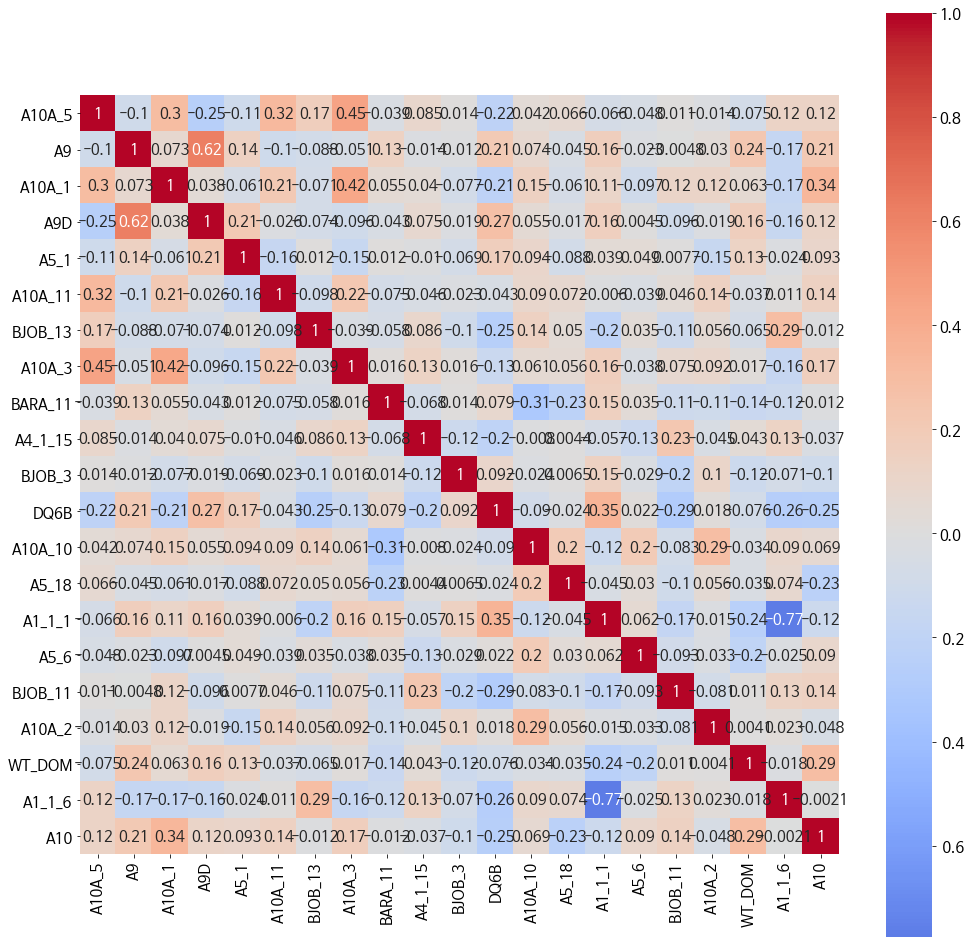

In [87]:
Top20(df_C)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


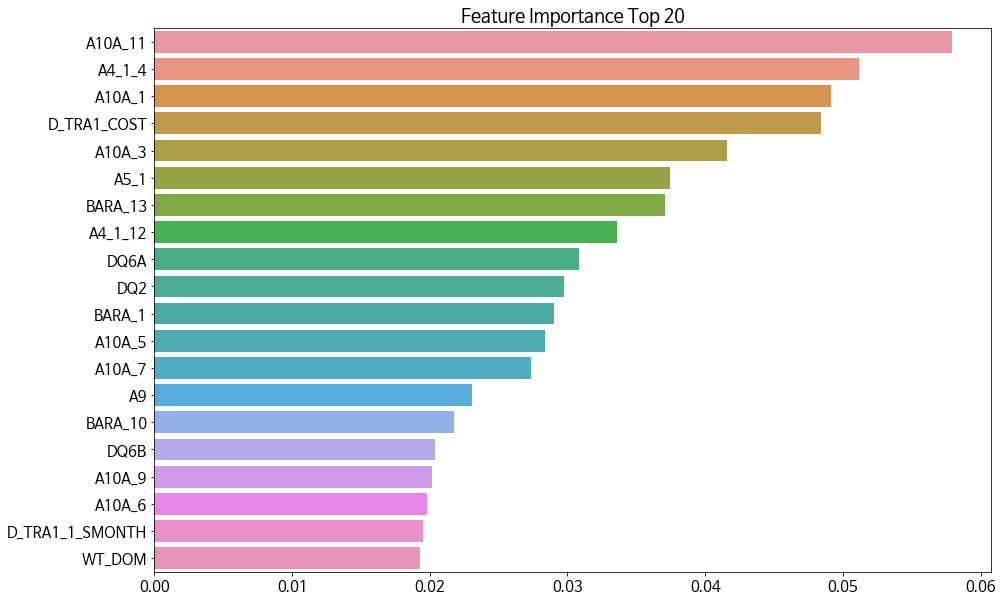

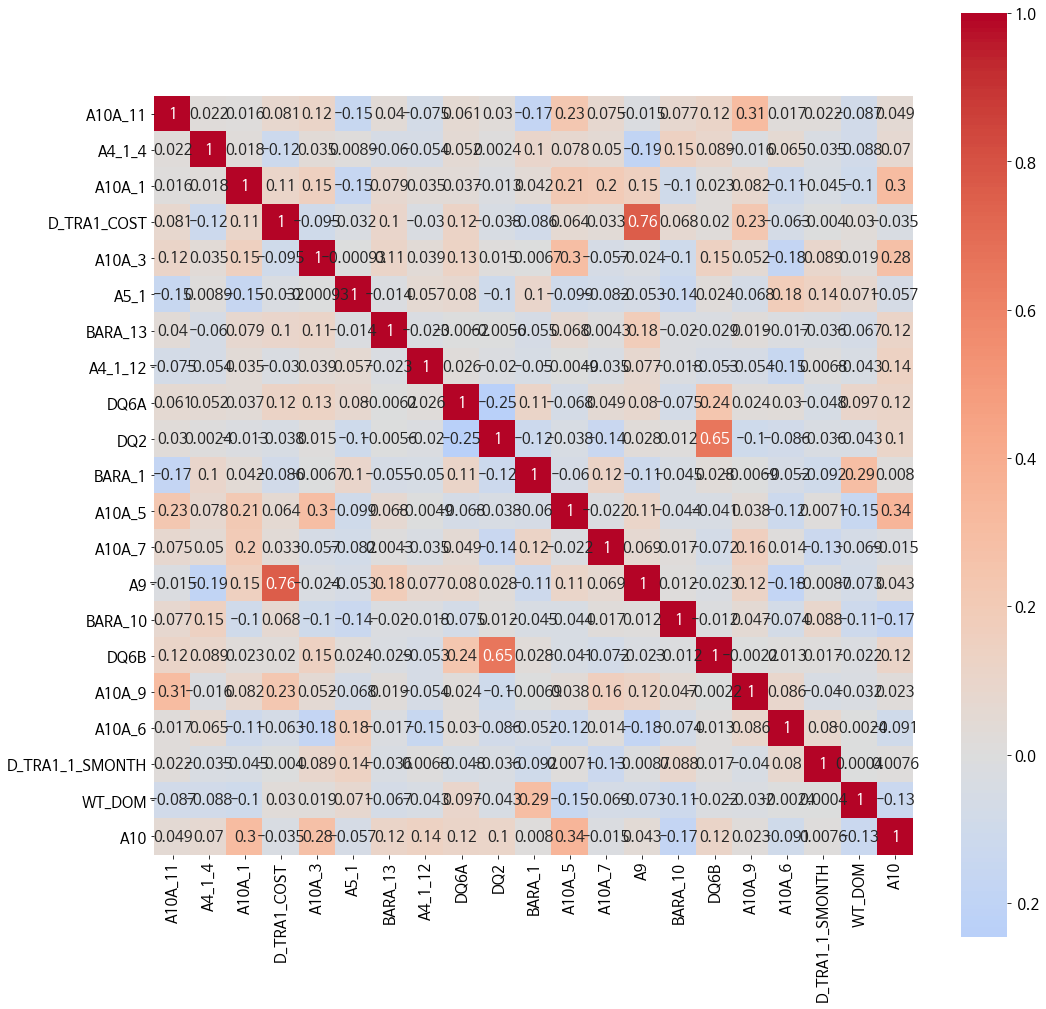

In [88]:
Top20(df_D)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


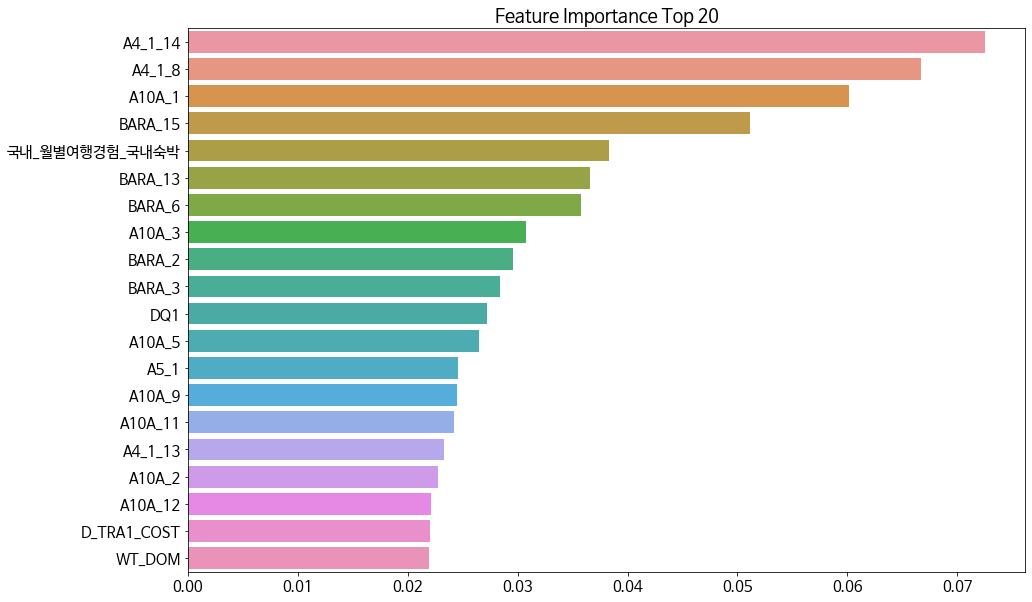

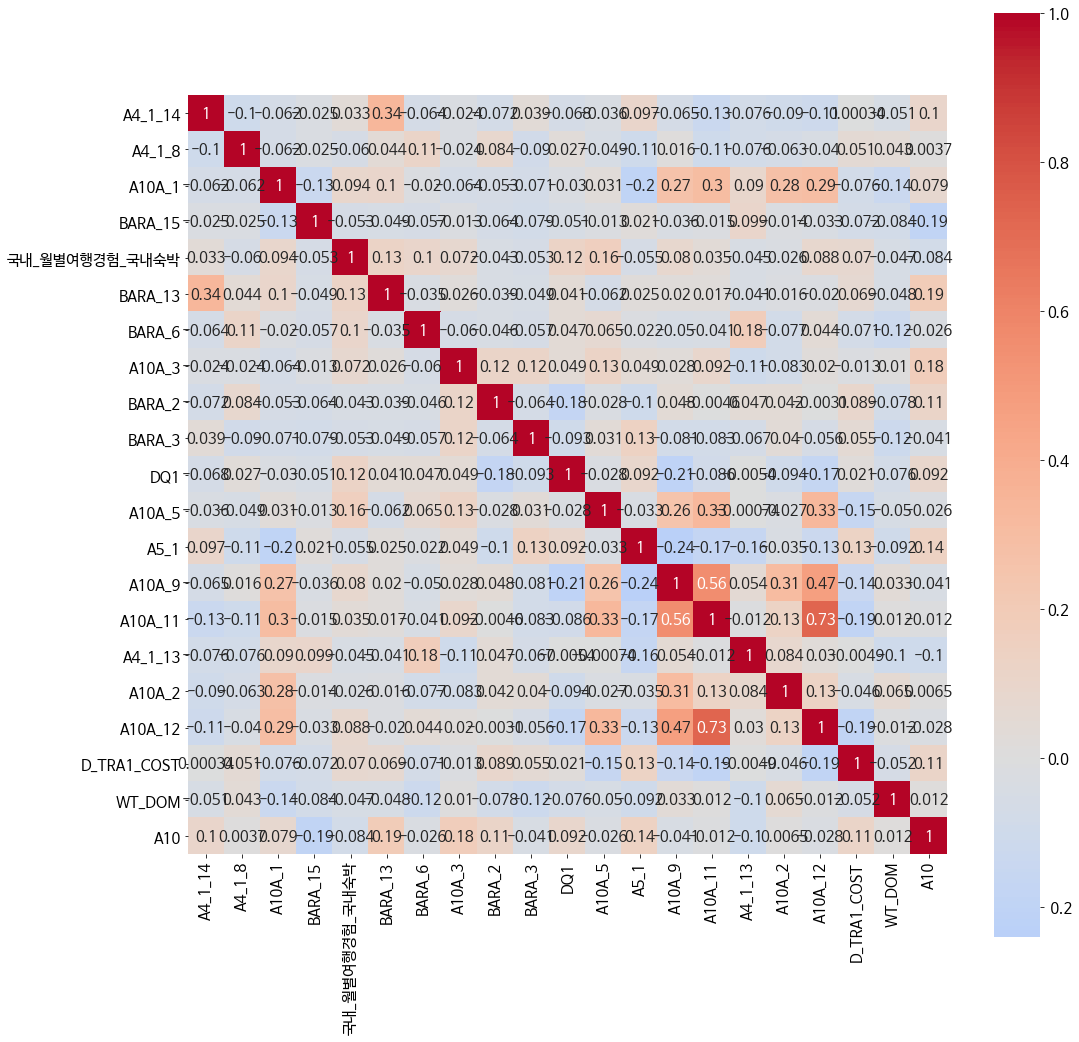

In [89]:
Top20(df_E)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


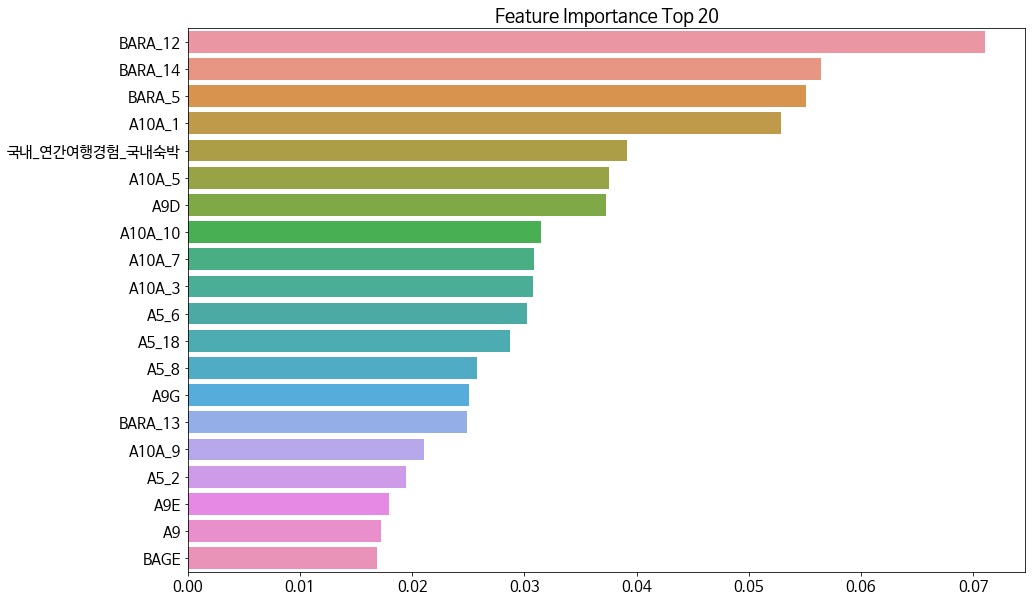

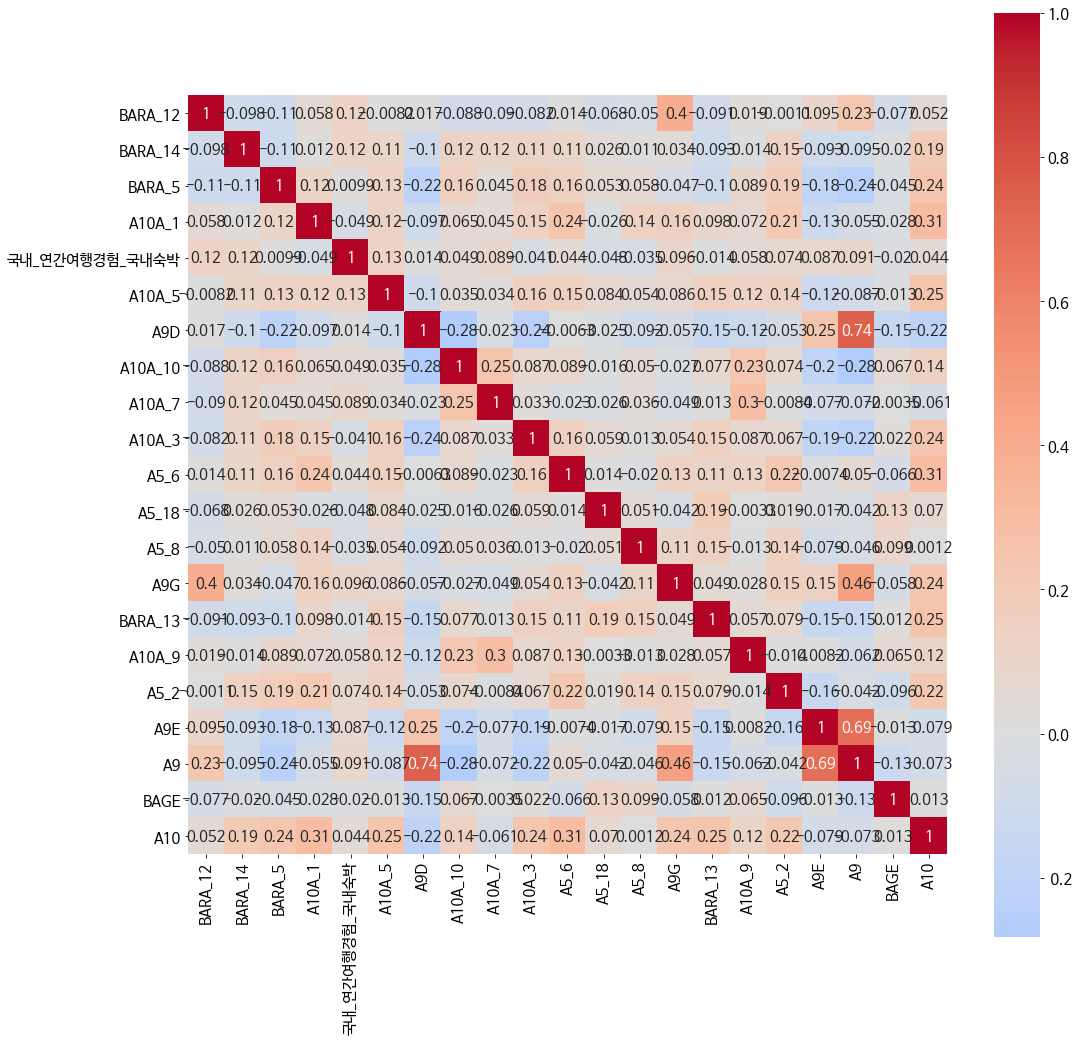

In [90]:
Top20(df_F)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


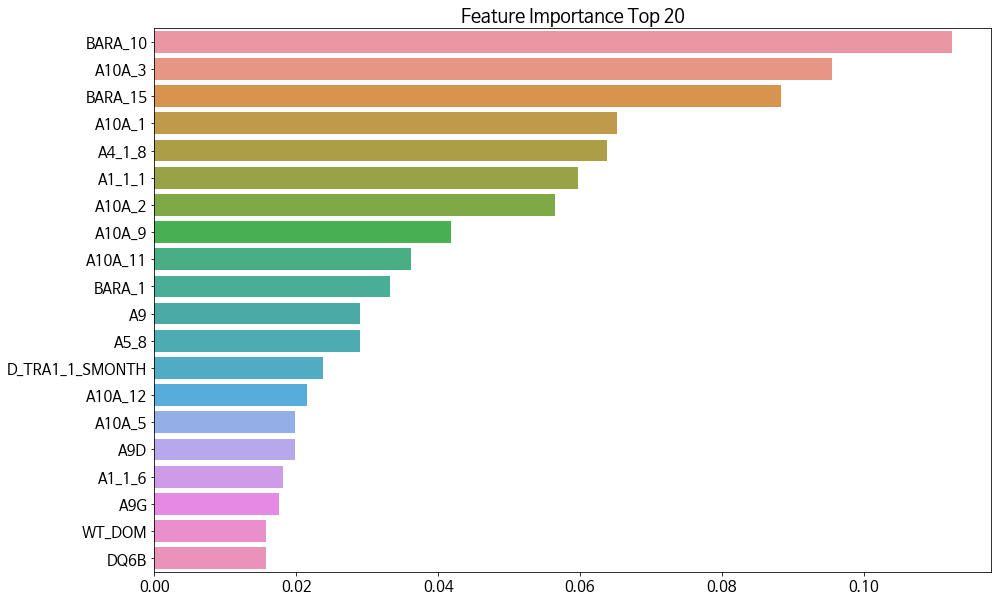

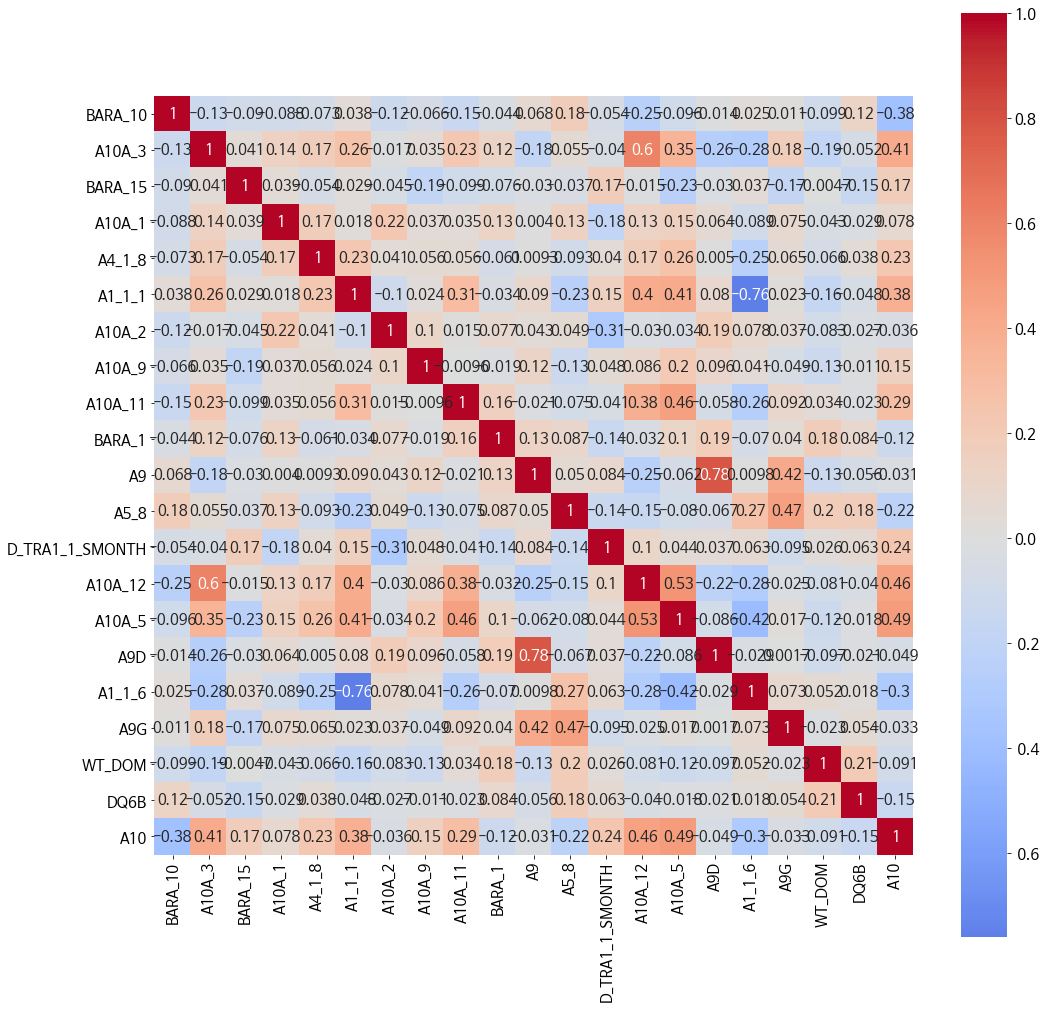

In [91]:
Top20(df_G)

# 신한카드 데이터 

In [ ]:
df_card = pd.read_csv("/content/drive/My Drive/관광/NATIVE_RE.txt")

In [ ]:
df_card

In [ ]:
result = df_card[df_card['v1|v2|v3|gb3|gb2|sex_ccd|cln_age_r|ta_ym|daw_ccd_r|apv_ts_dl_tm_r|vlm|usec'].str.contains('2020')]

In [ ]:
result.to_csv('/content/drive/My Drive/관광/result_txt.txt',index=False)

In [12]:
카드데이터= pd.read_csv("/content/drive/My Drive/관광/result_txt.txt",sep='|')

In [26]:
카드데이터.groupby('gb3')['gb2'].value_counts()

gb3     gb2    
문화예술활동  공연관람        346483
        사진촬영        146476
        미술공예참여      102667
        음악감상         39300
        악기연주         29212
스포츠활동   스포츠용품구매     496365
        레저스포츠       435184
        골프          409252
        헬스          260474
        자전거          81879
        스키            7089
        운동경기관람         572
여행      숙박          855795
        체험          235850
        교통          172975
        관광쇼핑        109567
        여행사          36783
취미오락    외식         2028289
        종합쇼핑       1688391
        미용          734485
        인터넷게임       701311
        패션쇼핑        580570
        유흥          447797
        목욕          398790
        독서          303558
        애완동물돌보기     282839
        교육훈련        226232
        종교활동        112629
Name: gb2, dtype: int64

In [27]:
def 카드데이터생성(이름,숙박여부):
  카드데이터2= 카드데이터[카드데이터['gb3'] == '여행']
  카드데이터3 = 카드데이터2[카드데이터2['ta_ym'] > 201912]
  카드데이터4 = 카드데이터3[카드데이터3['ta_ym'] < 202100]
  카드데이터4.reset_index(inplace=True,drop=True)
  카드데이터최종=카드데이터4[카드데이터4['v3'] == 이름]
  if 숙박여부 == 0:
    카드데이터숙박제외 = 카드데이터최종[카드데이터최종['gb2'] != '숙박']
    카드데이터숙박제외.to_csv('/content/drive/My Drive/관광/{0}_숙박제외.csv'.format(이름),index=False)
  else:
    카드데이터최종.to_csv('/content/drive/My Drive/관광/{0}.csv'.format(이름),index=False)

    print(카드데이터최종)

In [29]:
카드데이터생성('포항시',1)

<Figure size 1080x360 with 0 Axes>

          v1  v2   v3 gb3   gb2  ...   ta_ym  daw_ccd_r  apv_ts_dl_tm_r      vlm usec
523       충북  경북  포항시  여행    숙박  ...  202001        RED              휴식   331500    5
524       전남  경북  포항시  여행    숙박  ...  202001      WHITE              활동   306000    5
525       울산  경북  포항시  여행    숙박  ...  202001        RED              휴식   204000    5
526       경남  경북  포항시  여행    숙박  ...  202001      WHITE              휴식   591600    5
527       충남  경북  포항시  여행    숙박  ...  202001      WHITE              휴식  1734000   25
...      ...  ..  ...  ..   ...  ...     ...        ...             ...      ...  ...
1397678   충북  경북  포항시  여행    숙박  ...  202009      WHITE              휴식   459900    5
1398214  NaN  경북  포항시  여행    숙박  ...  202010        RED              활동   613200   10
1398215   세종  경북  포항시  여행    교통  ...  202012      WHITE              활동   613200   10
1398216   인천  경북  포항시  여행    숙박  ...  202010        RED              휴식   664300   10
1398378   대전  경북  포항시  여행  관광쇼핑  ...  202008      WHIT

Text(0.5, 1.0, '경상북도 포항시')

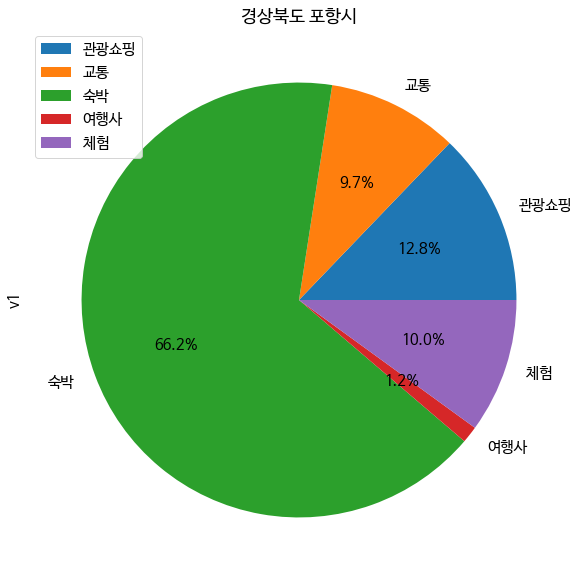

In [31]:
카드데이터2= 카드데이터[카드데이터['gb3'] == '여행']
카드데이터3 = 카드데이터2[카드데이터2['ta_ym'] > 201912]
카드데이터4 = 카드데이터3[카드데이터3['ta_ym'] < 202100]
카드데이터4.reset_index(inplace=True,drop=True)
카드데이터최종=카드데이터4[ (카드데이터4['v3'] == '포항시' )]
카드데이터최종.groupby(['gb2']).count().plot(kind='pie', y='v1',autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.size'] = 15
plt.title('경상북도 포항시')

Text(0.5, 1.0, '경상북도 포항시')

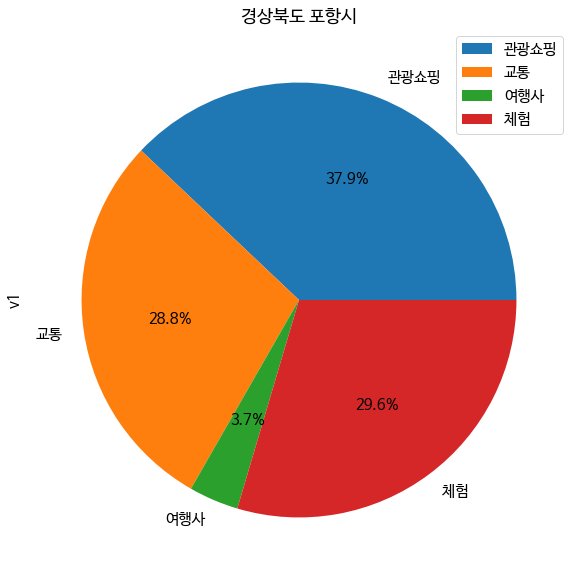

In [32]:
카드데이터2= 카드데이터[카드데이터['gb3'] == '여행']
카드데이터3 = 카드데이터2[카드데이터2['ta_ym'] > 201912]
카드데이터4 = 카드데이터3[카드데이터3['ta_ym'] < 202100]
카드데이터4.reset_index(inplace=True,drop=True)
카드데이터최종=카드데이터4[ (카드데이터4['v3'] == '포항시' )]
카드데이터숙박제외 = 카드데이터최종[카드데이터최종['gb2'] != '숙박']
카드데이터숙박제외.groupby(['gb2']).count().plot(kind='pie', y='v1',autopct='%1.1f%%')
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['font.size'] = 15
plt.title('경상북도 포항시')

# 인스타 그램 해시태그 웹스크래핑
+ colab과 셀레니움의 연동문제로 colab이 아닌 로컬환경에서 수집하였음
+ 아이디, 비밀번호 #### 4~5번째줄은 개인정보 문제로 #처리하였음

In [ ]:
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import re

In [ ]:
keyword = "포항여행"
count = 1000

username = #####
userpw = ######
time.sleep(3)

url = "https://www.instagram.com/explore/tags/{}/".format(keyword)

insta_df = pd.DataFrame("", index=np.arange(1,count+1), columns=["account","date", "t1", "t2", "t3", "t4", "t5", "t6", "t7", "t8", "t9", "t10" , "t11", "t12", "t13", "t14", "t15", "t16", "t17", "t18", "t19", "t20"])
instagram_account =[]
instagram_tags = []
instagram_tag_dates = []

loginUrl = 'https://www.instagram.com/accounts/login/'

driver = wd.Chrome("chromedriver.exe")
driver.get(loginUrl)
time.sleep(2)
driver.find_element_by_name('username').send_keys(username)
driver.find_element_by_name('password').send_keys(userpw)
time.sleep(2)
driver.find_element_by_css_selector('button.sqdOP.L3NKy.y3zKF').click()
time.sleep(3)
driver.find_element_by_css_selector('button.sqdOP.yWX7d.y3zKF').click()
time.sleep(3)
driver.find_element_by_css_selector('button.aOOlW.HoLwm').click()
time.sleep(3)
driver.get(url)
time.sleep(15)
driver.find_element_by_css_selector('div.v1Nh3.kIKUG._bz0w').click()
time.sleep(3)

for i in range(count):
    try: 
        account_data = driver.find_element_by_css_selector('a.sqdOP.yWX7d._8A5w5.ZIAjV')
        account_text = account_data.text
        
        date = driver.find_element_by_css_selector("time.FH9sR.Nzb55").text # 날짜 선택
        
        if date.find('시간') != -1 or date.find('일') != -1 or date.find('분') != -1:
            date_text = '0주'
        else:
            date_text = date
        data = driver.find_element_by_css_selector('.C7I1f.X7jCj')
        tag_raw = data.text
        tag = re.findall('#[A-Za-z0-9가-힣]+', tag_raw)
        tag = ''.join(tag).replace("#"," ")
        tag_data = tag.split()
    except:
        tag_data = "error"
        date_text = "error"
        
    try: 
        WebDriverWait(driver,50).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'a._65Bje.coreSpriteRightPaginationArrow')))
        driver.find_element_by_css_selector('a._65Bje.coreSpriteRightPaginationArrow').click()
    except:
      print("크롤링이 비정상적으로 종료되었습니다")
      driver.quit()
    
    time.sleep(5)
    print('{}, {}번째 게시물 탐색 완료'.format(time.strftime('%c', time.localtime(time.time())), i+1))
    print(account_text)
    print(date_text)
        
    insta_df.iloc[i, 0] = account_text
    insta_df.iloc[i, 1] = date_text
    
    for j in range(17):
        try:
            insta_df.iloc[i,j+2] = tag_data[j]
        except :
            break


insta_df.to_excel("./"+keyword+"_results2.xlsx")


print('크롤링 종료')
driver.quit()

# 동시출현 네트워크 wiht gephi
+ colab konlpy 설치 문제로 로컬환경에서 코드를 작성하고 실행하였음

In [38]:
df= pd.read_excel('/content/drive/My Drive/관광/나홀로여행_results.xlsx')

In [39]:
df.drop(columns='Unnamed: 0',inplace=True)

In [40]:
df['text'] = "삭제"
df.fillna('',inplace=True)
for i in range(0,1000):
    try:
    
        df['text'].iloc[i] = df['t1'].iloc[i] + " " + df['t2'].iloc[i] + " " + df['t3'].iloc[i] + " " + df['t4'].iloc[i] + " " + df['t5'].iloc[i] + " " + df['t6'].iloc[i] + " " + df['t7'].iloc[i] + " " + df['t8'].iloc[i] + " " + df['t9'].iloc[i] + " " + df['t10'].iloc[i] + " " + df['t11'].iloc[i] + " " + df['t12'].iloc[i] + " " + df['t13'].iloc[i] + " " + df['t14'].iloc[i] + " " + df['t15'].iloc[i] + " " + df['t16'].iloc[i] + " " + df['t17'].iloc[i] + " " + df['t18'].iloc[i] + " " + df['t19'].iloc[i] + " " + df['t20'].iloc[i]
    except Exception:
        pass

In [41]:
df['text']=df['text'].str.strip()
index_=df[df['text'] == ''].index
df.drop(index_,inplace=True)

In [42]:
df

,account,date,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,text
0,sungzu_01,2주,일상,일상스타그램,데일리,데일리스타그램,dailylook,헬스,얼빡샷,나홀로여행,여행,,,,,,,,,,,,일상 일상스타그램 데일리 데일리스타그램 dailylook 헬스 얼빡샷 나홀로여행 여행
1,onejinkyung,13주,부산겹벚꽃,경주겹벚꽃,wonchu,,,,,,,,,,,,,,,,,,부산겹벚꽃 경주겹벚꽃 wonchu
2,s_hungs02,8주,02년생,20살,차쟁이,드라이브,일상,바다구경,전망대,바다갬성,해안도로,나홀로여행,혼드라이브,혼자만의시간,,,,,,,,,02년생 20살 차쟁이 드라이브 일상 바다구경 전망대 바다갬성 해안도로 나홀로여행 ...
4,stayfolio,6주,썸원스페이지숲,스테이폴리오,스테이폴리오,춘천,숲속뷰,,,,,,,,,,,,,,,,썸원스페이지숲 스테이폴리오 스테이폴리오 춘천 숲속뷰
6,l_y_ring,5주,행복한,연차,휴가,나홀로여행,경주여행,경주당일치기,황리단길,대릉원,경주월드,혼술,경주,혼여행,너무좋아요,,,,,,,,행복한 연차 휴가 나홀로여행 경주여행 경주당일치기 황리단길 대릉원 경주월드 혼술 경...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,tak_a_p,3주,캐논,캐논dslr,캐논800d,2470mmf28,신계륵,여름밤,제주,제주도,반딧불,반딧불이,나홀로여행,사진,사진스타그램,포토스타그램,사진소통,사진맞팔,사진작가,,,,캐논 캐논dslr 캐논800d 2470mmf28 신계륵 여름밤 제주 제주도 반딧불 ...
995,a_eun_go,3주,나홀로여행,,,,,,,,,,,,,,,,,,,,나홀로여행
997,yee_hw,3주,제주도,나홀로여행,여행스타그램,우도,제트보트,selfie,,,,,,,,,,,,,,,제주도 나홀로여행 여행스타그램 우도 제트보트 selfie
998,hyeonga_travel,3주,hyeongain,택이네조개전골,여행기록,뚜벅이여행,여행코스,selfie,ootd,오오티디,아웃핏,데일리룩,셀카그램,셀카,셀피,뚜벅이여행,여행에미치다,여행스타그램,국내여행,,,,hyeongain 택이네조개전골 여행기록 뚜벅이여행 여행코스 selfie ootd ...


In [ ]:
df.reset_index(inplace=True)

In [ ]:
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tagger = Twitter()
stop_wordz= ['애']
tfidf = TfidfVectorizer(stop_words=stop_wordz,
                        lowercase=True,
                        max_features=1000)
content = df['text']
tdm = tfidf.fit_transform(content)
def get_nouns(text):
    nouns = tagger.nouns(text)
    nouns = [word for word in nouns if len(word) > 1]
    return nouns

cv = CountVectorizer(max_features=1000, tokenizer=get_nouns
tdm = cv.fit_transform(df['text']))

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tdm2 = tfidf.fit_transform(tdm)
words = cv.get_feature_names()
count = tdm.sum(axis=0)

df23 = pd.DataFrame(words)
df23['count'] = count[0].tolist()[0]
df23.rename(columns={0:'word'},inplace=True)

In [ ]:
import konlpy
import csv
from tqdm import tqdm
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
for i, document in tqdm(enumerate(df['text'])):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document,stem=True): #Letimazation
        #if word[1] in ['Noun']:
        clean_words.append(word[0])
        #    clean_words.append(word[0])
    document = ' '.join(clean_words)

In [ ]:
text_list = df['text'].tolist()
text_result = []
for i, document in tqdm(enumerate(text_list)):
    okt = konlpy.tag.Okt()
    clean_words = []
    for word in okt.pos(document,stem=True): #Letimazation
        if word[1] in ['Noun']:
            clean_words.append(word[0])
    document = ' '.join(clean_words)
    text_result.append(document)

In [ ]:
vectorize = CountVectorizer(tokenizer=get_nouns,min_df=50)
X = vectorize.fit_transform(text_result)
features = vectorize.get_feature_names()
Vector_Matrix = np.array(X.toarray())
X_np = np.array(X.toarray())
df = pd.DataFrame(X_np)
df.to_csv("Text_code_result2.csv",encoding="utf-8-sig",index = features,header = features)

In [ ]:
df3 = df.T.dot(df)
df3.index=features
df3.columns = features
df3.to_csv("result.csv",encoding="utf-8-sig")

In [ ]:
!pip install wordcloud
!pip install matplotlib
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

twitter = Twitter()
morphs = []
for sentence in text_result:
    morphs.append(twitter.pos(sentence))

print(morphs)


In [ ]:
noun_adj_adv_list=[]
for sentence in morphs :
    for word, tag in sentence :
        if tag in ['Noun']:
            noun_adj_adv_list.append(word)
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())


In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords


In [ ]:
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')

set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)


In [ ]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='white',colormap = "Accent_r", width=1500, height=1000).generate_from_frequencies(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


# EDA

In [5]:
df_EDA = pd.read_csv('/content/drive/My Drive/관광/클러스터최종.csv')

Text(0.5, 1.0, 'Cluster Amount')

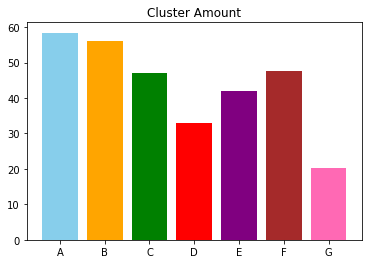

In [11]:
from matplotlib import font_manager, rc
from matplotlib import style
aa=df_EDA.groupby('cluster').mean()['SAGE'].index
bb =df_EDA.groupby('cluster').mean()['SAGE'].tolist()

colors = ['skyblue','orange','green','red','purple','brown','hotpink']
plt.bar(aa,bb,color=colors)
plt.title('Cluster Amount')